In [35]:
print("\n" + "="*80)
print("PROJECT COMPLETION SUMMARY")
print("="*80)

summary = f"""

Training results:
├─ FFT-MLP: {fft_f1:.4f} F1 ({fft_f1*100:.2f}%)
├─ CNN-BiLSTM: {cnn_f1:.4f} F1 ({cnn_f1*100:.2f}%)
└─ Late Fusion: {fusion_f1:.4f} F1 ({fusion_f1*100:.2f}%)

"""

print(summary)



PROJECT COMPLETION SUMMARY


Training results:
├─ FFT-MLP: 0.8334 F1 (83.34%)
├─ CNN-BiLSTM: 0.9134 F1 (91.34%)
└─ Late Fusion: 0.9193 F1 (91.93%)




## Project Completion Summary

This final cell prints a concise summary of the evaluation results, highlighting key F1 scores for each model.

Use this summary as a quick inspection of final performance. For publication or formal reporting, refer to the saved CSV and visualization files created earlier.


4. GENERATING VISUALIZATIONS


/var/folders/t0/885yq0ls66b2lp8j6zv4vs640000gn/T/ipykernel_81389/1176950476.py:119: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/t0/885yq0ls66b2lp8j6zv4vs640000gn/T/ipykernel_81389/1176950476.py:119: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/t0/885yq0ls66b2lp8j6zv4vs640000gn/T/ipykernel_81389/1176950476.py:119: UserWarning: Glyph 129353 (\N{THIRD PLACE MEDAL}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/t0/885yq0ls66b2lp8j6zv4vs640000gn/T/ipykernel_81389/1176950476.py:120: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) Arial.
  plt.savefig('../data/final_evaluation_visualization.png', dpi=300, bbox_inches='tight')
/var/folders/t0/885yq0ls66b2lp8j6zv4vs640000gn/T/ipykernel_81389/1176950476.py:120: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) Arial.
  plt.savefig('../data/final_evalua


✅ Visualization saved to: ../data/final_evaluation_visualization.png


/Users/huanganzheng/bfrb-detection/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/huanganzheng/bfrb-detection/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/huanganzheng/bfrb-detection/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129353 (\N{THIRD PLACE MEDAL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


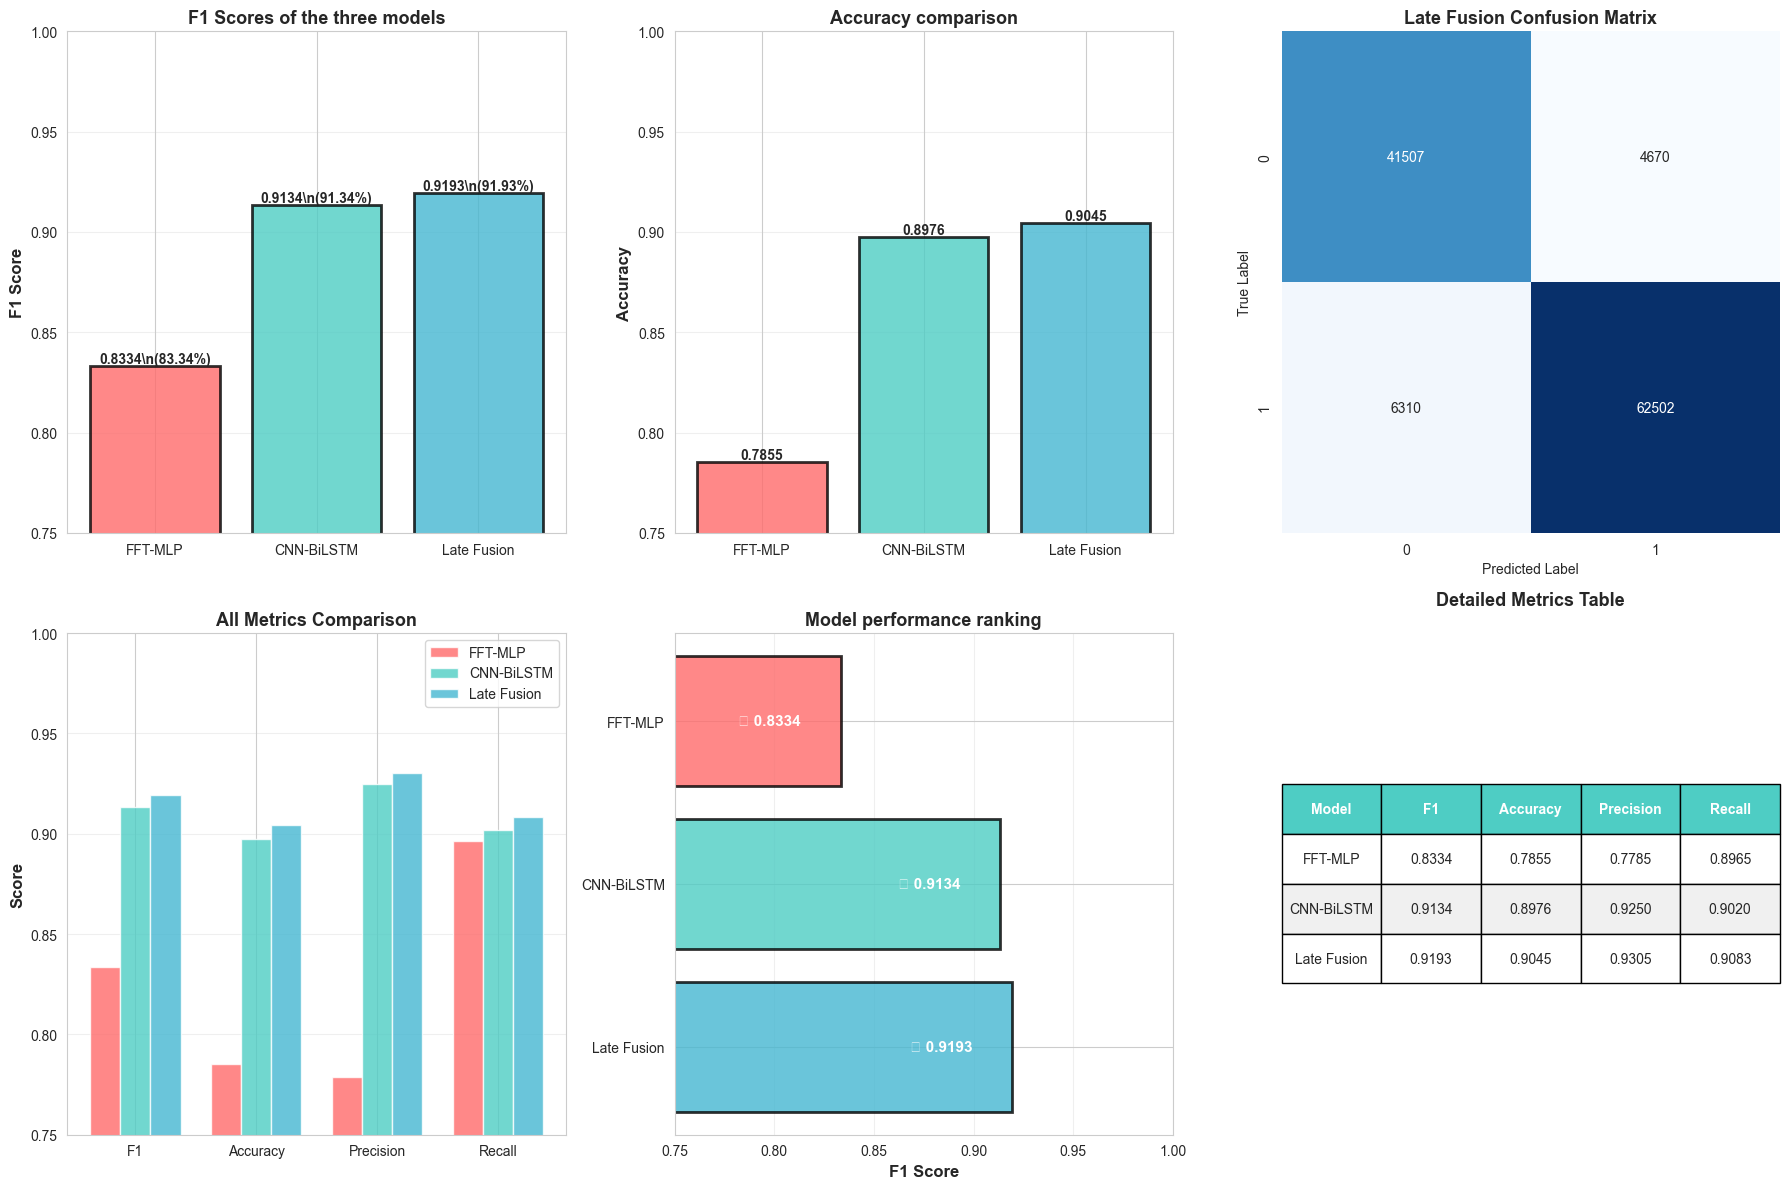

In [36]:
print("\n" + "="*80)
print("4. GENERATING VISUALIZATIONS")
print("="*80)

# Prepare data
models = ['FFT-MLP', 'CNN-BiLSTM', 'Late Fusion']
f1_scores = [fft_f1, cnn_f1, fusion_f1]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Create 6 subplots
fig = plt.figure(figsize=(18, 12))

# Plot 1: F1 scores comparison
ax1 = plt.subplot(2, 3, 1)
bars = ax1.bar(models, f1_scores, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
ax1.set_title('F1 Scores of the three models', fontsize=13, fontweight='bold')
ax1.set_ylim([0.75, 1.0])
ax1.grid(axis='y', alpha=0.3)

for bar, score in zip(bars, f1_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{score:.4f}\\n({score*100:.2f}%)',
             ha='center', va='bottom', fontweight='bold')

# Plot 2: Accuracy comparison
ax2 = plt.subplot(2, 3, 2)
accuracies = [fft_acc, cnn_acc, fusion_acc]
bars = ax2.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('Accuracy comparison', fontsize=13, fontweight='bold')
ax2.set_ylim([0.75, 1.0])
ax2.grid(axis='y', alpha=0.3)

for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Late Fusion confusion matrix
ax3 = plt.subplot(2, 3, 3)
sns.heatmap(fusion_cm, annot=True, fmt='d', cmap='Blues', ax=ax3, cbar=False)
ax3.set_title('Late Fusion Confusion Matrix', fontsize=13, fontweight='bold')
ax3.set_ylabel('True Label')
ax3.set_xlabel('Predicted Label')

# Plot 4: All metrics comparison
ax4 = plt.subplot(2, 3, 4)
metrics = ['F1', 'Accuracy', 'Precision', 'Recall']
fft_metrics = [fft_f1, fft_acc, fft_precision, fft_recall]
cnn_metrics = [cnn_f1, cnn_acc, cnn_precision, cnn_recall]
fusion_metrics = [fusion_f1, fusion_acc, fusion_precision, fusion_recall]

x = np.arange(len(metrics))
width = 0.25

ax4.bar(x - width, fft_metrics, width, label='FFT-MLP', color='#FF6B6B', alpha=0.8)
ax4.bar(x, cnn_metrics, width, label='CNN-BiLSTM', color='#4ECDC4', alpha=0.8)
ax4.bar(x + width, fusion_metrics, width, label='Late Fusion', color='#45B7D1', alpha=0.8)

ax4.set_ylabel('Score', fontsize=12, fontweight='bold')
ax4.set_title('All Metrics Comparison', fontsize=13, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(metrics)
ax4.legend()
ax4.grid(axis='y', alpha=0.3)
ax4.set_ylim([0.75, 1.0])

# Plot 5: Performance ranking
ax5 = plt.subplot(2, 3, 5)
sorted_indices = np.argsort(f1_scores)[::-1]
sorted_models = [models[i] for i in sorted_indices]
sorted_scores = [f1_scores[i] for i in sorted_indices]
sorted_colors = [colors[i] for i in sorted_indices]

bars = ax5.barh(sorted_models, sorted_scores, color=sorted_colors, alpha=0.8, edgecolor='black', linewidth=2)
ax5.set_xlabel('F1 Score', fontsize=12, fontweight='bold')
ax5.set_title('Model performance ranking', fontsize=13, fontweight='bold')
ax5.set_xlim([0.75, 1.0])
ax5.grid(axis='x', alpha=0.3)

for i, (bar, score) in enumerate(zip(bars, sorted_scores)):
    rank = '🥇' if i == 0 else '🥈' if i == 1 else '🥉'
    ax5.text(score - 0.02, bar.get_y() + bar.get_height()/2.,
             f'{rank} {score:.4f}',
             ha='right', va='center', fontweight='bold', color='white', fontsize=11)

# Plot 6: Metrics table
ax6 = plt.subplot(2, 3, 6)
ax6.axis('tight')
ax6.axis('off')

table_data = [
    ['FFT-MLP', f'{fft_f1:.4f}', f'{fft_acc:.4f}', f'{fft_precision:.4f}', f'{fft_recall:.4f}'],
    ['CNN-BiLSTM', f'{cnn_f1:.4f}', f'{cnn_acc:.4f}', f'{cnn_precision:.4f}', f'{cnn_recall:.4f}'],
    ['Late Fusion', f'{fusion_f1:.4f}', f'{fusion_acc:.4f}', f'{fusion_precision:.4f}', f'{fusion_recall:.4f}']
]

table = ax6.table(cellText=table_data,
                 colLabels=['Model', 'F1', 'Accuracy', 'Precision', 'Recall'],
                 cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

for i in range(5):
    table[(0, i)].set_facecolor('#4ECDC4')
    table[(0, i)].set_text_props(weight='bold', color='white')

for i in range(1, 4):
    for j in range(5):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

ax6.set_title('Detailed Metrics Table', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../data/final_evaluation_visualization.png', dpi=300, bbox_inches='tight')
print("\n✅ Visualization saved to: ../data/final_evaluation_visualization.png")
plt.show()

## Visualization Components and Output

This cell produces a multi-panel figure summarizing model performance for reporting and publication.

Figure composition:

- Panel 1: Bar chart comparing F1 scores across models (explicit values shown).
- Panel 2: Accuracy comparison bar chart.
- Panel 3: Confusion matrix (Late Fusion).
- Panel 4: Grouped bar chart comparing F1 / Accuracy / Precision / Recall.
- Panel 5: Horizontal ranked bar chart (performance ordering with medals).
- Panel 6: Detailed metrics table.

Implementation notes:

- Visual styles use `seaborn` with `whitegrid` and consistent color palette.
- Y-axis ranges are chosen for clarity (e.g., 0.75–1.0).
- The final figure is saved to `../data/final_evaluation_visualization.png` at 300 DPI for inclusion in reports or publications.

Export: The high-resolution PNG and the CSV output together provide both visual and tabular artifacts for downstream use.

In [37]:
print("\n" + "="*80)
print("3. RESULTS SUMMARY")
print("="*80)

results_data = {
    'Model': ['FFT-MLP', 'CNN-BiLSTM', 'Late Fusion'],
    'F1 Score': [fft_f1, cnn_f1, fusion_f1],
    'Accuracy': [fft_acc, cnn_acc, fusion_acc],
    'Precision': [fft_precision, cnn_precision, fusion_precision],
    'Recall': [fft_recall, cnn_recall, fusion_recall]
}

results_df = pd.DataFrame(results_data)

print("\nDetailed metrics:")
print("="*80)
print(results_df.to_string(index=False))

# Save to CSV
results_df.to_csv('../data/final_results.csv', index=False, encoding='utf-8-sig')
print("\n✅ Results saved to: ../data/final_results.csv")


3. RESULTS SUMMARY

Detailed metrics:
      Model  F1 Score  Accuracy  Precision   Recall
    FFT-MLP  0.833383  0.785475   0.778546 0.896530
 CNN-BiLSTM  0.913365  0.897599   0.924996 0.902023
Late Fusion  0.919255  0.904513   0.930477 0.908301

✅ Results saved to: ../data/final_results.csv


## Results Aggregation and Export

This cell consolidates per-model metrics into a `pandas.DataFrame` and persists the results to CSV for reproducibility and external analysis.

Actions taken:

- Assemble a tabular summary with columns: `Model`, `F1 Score`, `Accuracy`, `Precision`, `Recall`.
- Print a human-readable table to the notebook output for quick inspection.
- Save the results to `../data/final_results.csv` using UTF-8 with BOM (`utf-8-sig`) for Excel compatibility.

Tip: Keep this CSV as the canonical machine-readable summary when sharing results or preparing reports.

In [38]:
print("\n" + "="*80)
print("2. EVALUATING ALL MODELS")
print("="*80)

# Evaluate FFT-MLP
print("\nEvaluating FFT-MLP...")
fft_preds = []
fft_labels = []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        logits = fft_mlp_model(X_batch)
        preds = torch.argmax(logits, dim=1)
        fft_preds.extend(preds.cpu().numpy())
        fft_labels.extend(y_batch.cpu().numpy())

fft_f1 = f1_score(fft_labels, fft_preds)
fft_acc = accuracy_score(fft_labels, fft_preds)
fft_precision = precision_score(fft_labels, fft_preds)
fft_recall = recall_score(fft_labels, fft_preds)
fft_cm = confusion_matrix(fft_labels, fft_preds)

print(f"✅ FFT-MLP: F1={fft_f1:.4f}, Acc={fft_acc:.4f}, Prec={fft_precision:.4f}, Recall={fft_recall:.4f}")

# Evaluate CNN-BiLSTM
print("Evaluating CNN-BiLSTM...")
cnn_preds = []
cnn_labels = []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        logits = cnn_bilstm_model(X_batch)
        preds = torch.argmax(logits, dim=1)
        cnn_preds.extend(preds.cpu().numpy())
        cnn_labels.extend(y_batch.cpu().numpy())

cnn_f1 = f1_score(cnn_labels, cnn_preds)
cnn_acc = accuracy_score(cnn_labels, cnn_preds)
cnn_precision = precision_score(cnn_labels, cnn_preds)
cnn_recall = recall_score(cnn_labels, cnn_preds)
cnn_cm = confusion_matrix(cnn_labels, cnn_preds)

print(f"✅ CNN-BiLSTM: F1={cnn_f1:.4f}, Acc={cnn_acc:.4f}, Prec={cnn_precision:.4f}, Recall={cnn_recall:.4f}")

# Evaluate Late Fusion
print("Evaluating Late Fusion...")
fusion_preds = []
fusion_labels = []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        
        # FFT predictions
        fft_logits = fft_mlp_model(X_batch)
        fft_proba = torch.softmax(fft_logits, dim=1)
        
        # CNN predictions
        cnn_logits = cnn_bilstm_model(X_batch)
        cnn_proba = torch.softmax(cnn_logits, dim=1)
        
        # Fusion
        fusion_proba = 0.3 * fft_proba + 0.7 * cnn_proba
        preds = torch.argmax(fusion_proba, dim=1)
        
        fusion_preds.extend(preds.cpu().numpy())
        fusion_labels.extend(y_batch.cpu().numpy())

fusion_f1 = f1_score(fusion_labels, fusion_preds)
fusion_acc = accuracy_score(fusion_labels, fusion_preds)
fusion_precision = precision_score(fusion_labels, fusion_preds)
fusion_recall = recall_score(fusion_labels, fusion_preds)
fusion_cm = confusion_matrix(fusion_labels, fusion_preds)

print(f"✅ Late Fusion: F1={fusion_f1:.4f}, Acc={fusion_acc:.4f}, Prec={fusion_precision:.4f}, Recall={fusion_recall:.4f}")


2. EVALUATING ALL MODELS

Evaluating FFT-MLP...
✅ FFT-MLP: F1=0.8334, Acc=0.7855, Prec=0.7785, Recall=0.8965
Evaluating CNN-BiLSTM...
✅ CNN-BiLSTM: F1=0.9134, Acc=0.8976, Prec=0.9250, Recall=0.9020
Evaluating Late Fusion...
✅ Late Fusion: F1=0.9193, Acc=0.9045, Prec=0.9305, Recall=0.9083


## Model Evaluation Procedure

This section evaluates each model on the validation dataset and computes standard classification metrics.

Evaluation workflow:

1. Run inference with `torch.no_grad()` to avoid gradient computation and reduce memory usage.
2. For each batch, obtain model logits and derive predictions via `argmax`.
3. Convert logits to probabilities where needed (softmax) for the late-fusion ensemble.
4. Compute metrics for each model:
   - F1 score (primary metric)
   - Accuracy
   - Precision
   - Recall
   - Confusion matrix

Late Fusion:

- The late-fusion ensemble combines model probabilities using predefined weights (default 0.3 for FFT-MLP, 0.7 for CNN-BiLSTM).
- The fused probabilities are converted to final predictions by `argmax` and evaluated like individual models.

All computed metrics and confusion matrices are stored for downstream reporting and visualization.

In [39]:
print("\n" + "="*80)
print("1. LOADING TRAINED MODELS")
print("="*80)

# Load FFT-MLP
fft_mlp_model = FFT_MLP(imu_dim=7, hidden_dim=128, num_classes=2).to(device)
fft_mlp_model.load_state_dict(torch.load('../data/fft_mlp_best_final.pth'))
fft_mlp_model.eval()
print("\n✅ FFT-MLP loaded")

# Load CNN-BiLSTM
cnn_bilstm_model = CNN_BiLSTM().to(device)
cnn_bilstm_model.load_state_dict(torch.load('../data/cnn_bilstm_best.pth'))
cnn_bilstm_model.eval()
print("✅ CNN-BiLSTM loaded")



1. LOADING TRAINED MODELS

✅ FFT-MLP loaded
✅ CNN-BiLSTM loaded


## Loading Pre-trained Models

This cell loads saved model weights for the two trained architectures and sets them to evaluation mode.

Operations:

- Instantiate model classes (`FFT_MLP`, `CNN_BiLSTM`) with the same architecture used during training
- Load corresponding `.pth` checkpoint files from `../data/`
- Call `.eval()` to disable dropout and other training-time behaviors

Why this matters:

- Ensuring architecture matches the checkpoint prevents state-dict load errors.
- Evaluation mode ensures deterministic inference suitable for metric computation.

In [40]:
import pickle
from torch.utils.data import DataLoader, TensorDataset

print("\n" + "="*80)
print("0. LOADING VALIDATION DATA")
print("="*80)

print("\nLoading validation data...")

# Check files exist
import os
val_files = ['../data/X_val_preprocessed.pkl', '../data/y_val_preprocessed.pkl']
for f in val_files:
    if os.path.exists(f):
        print(f"✅ Found: {f}")
    else:
        print(f"❌ Not found: {f}")

# Load data
X_val_preprocessed = pickle.load(open('../data/X_val_preprocessed.pkl', 'rb'))
y_val_preprocessed = pickle.load(open('../data/y_val_preprocessed.pkl', 'rb'))

# Convert to numpy array (if DataFrame)
if isinstance(X_val_preprocessed, pd.DataFrame):
    X_val_preprocessed = X_val_preprocessed.values
    print("✅ X_val converted from DataFrame to numpy array")

if isinstance(y_val_preprocessed, pd.DataFrame):
    y_val_preprocessed = y_val_preprocessed.values.flatten()
    print("✅ y_val converted from DataFrame to numpy array")
elif isinstance(y_val_preprocessed, pd.Series):
    y_val_preprocessed = y_val_preprocessed.values
    print("✅ y_val converted from Series to numpy array")

# Convert to tensors
X_val_tensor = torch.FloatTensor(X_val_preprocessed.copy())
y_val_tensor = torch.LongTensor(y_val_preprocessed.copy())

print(f"\n✅ Validation data shape: {X_val_tensor.shape}")
print(f"✅ Validation labels shape: {y_val_tensor.shape}")

# Create DataLoader
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

print(f"✅ DataLoader created (batch_size=128)")


0. LOADING VALIDATION DATA

Loading validation data...
✅ Found: ../data/X_val_preprocessed.pkl
✅ Found: ../data/y_val_preprocessed.pkl
✅ X_val converted from DataFrame to numpy array
✅ y_val converted from Series to numpy array

✅ Validation data shape: torch.Size([114989, 332])
✅ Validation labels shape: torch.Size([114989])
✅ DataLoader created (batch_size=128)


## Loading Validation Data

This cell loads preprocessed validation data from disk and prepares it for evaluation.

Steps performed:

- Verify the expected pickle files exist under `../data/`
- Load `X_val_preprocessed` and `y_val_preprocessed`
- Convert pandas objects (DataFrame / Series) to NumPy arrays when necessary
- Convert NumPy arrays to PyTorch tensors and create a `DataLoader` for evaluation

Notes:

- The `DataLoader` is created with `batch_size=128` and `shuffle=False` to ensure deterministic evaluation.
- Shapes are printed to help verify data integrity before running the models.

In [41]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
import pickle  
import os
from tqdm import tqdm

# Settings
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("Device:", device)

# ============================================================================
# Define model classes (copied from Notebook 4)
# ============================================================================

# 1. FFT-MLP model
class FFT_MLP(nn.Module):
    """FFT-MLP model"""
    
    def __init__(self, imu_dim=7, hidden_dim=128, num_classes=2):
        super(FFT_MLP, self).__init__()
        
        self.imu_dim = imu_dim
        
        # Number of features after FFT
        fft_features = imu_dim * 2  # 14
        
        # MLP layers
        self.mlp = nn.Sequential(
            nn.Linear(fft_features, hidden_dim),  # 14 → 128
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(hidden_dim, 64),  # 128 → 64
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(64, num_classes)  # 64 → 2
        )
    
    def forward(self, x):
        # Extract IMU data
        imu_data = x[:, :self.imu_dim]
        
        # FFT transform
        fft_result = torch.fft.fft(imu_data, dim=1)
        fft_real = torch.real(fft_result)
        fft_imag = torch.imag(fft_result)
        fft_features = torch.cat([fft_real, fft_imag], dim=1)
        
        # MLP classification
        output = self.mlp(fft_features)
        
        return output


# 2. CNN-BiLSTM model
class CNN_BiLSTM(nn.Module):
    """CNN-BiLSTM model"""
    
    def __init__(self, tof_dim=320, hidden_dim=64, num_classes=2):
        super(CNN_BiLSTM, self).__init__()
        
        self.tof_dim = tof_dim
        
        # CNN layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        
        # LSTM layers
        self.lstm = nn.LSTM(
            input_size=1024,
            hidden_size=hidden_dim,
            num_layers=2,
            bidirectional=True,
            batch_first=True
        )
        
        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(hidden_dim * 2, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        tof_data = x[:, -self.tof_dim:]
        batch_size = x.shape[0]
        tof_2d = tof_data.view(batch_size, 1, 64, 5)
        
        x = self.conv1(tof_2d)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = x.view(batch_size, -1)
        
        x = x.unsqueeze(1)
        x, (h_n, c_n) = self.lstm(x)
        x = x[:, -1, :]
        
        x = self.fc(x)
        
        return x

print("\n✅ Model classes defined")

Device: cpu

✅ Model classes defined


# Evaluation Notebook

This notebook performs final evaluation and reporting for the BFRB detection models. It is organized to:

- Load preprocessed validation data
- Load pre-trained model weights
- Evaluate `FFT-MLP`, `CNN-BiLSTM`, and a late-fusion ensemble
- Aggregate metrics and save results to CSV
- Generate publication-quality visualizations and a concise project summary

The code cells below initialize the environment (imports, device selection, plotting style) and define the model classes used for inference.